In [104]:
# coding=utf8

import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [105]:
# 加载数据
df = pd.read_csv('data/DQC00-1d.txt',
                 sep=',',
                 nrows=5000,
                 index_col=['datetime'],  # 设置行索引
                 parse_dates=['datetime'],  # 解析时间 20100104130500.0
                 date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S.%f'),  # 时间解析的格式，进行毫秒级数据解析
                 usecols=['datetime', 'open', 'high', 'low', 'close', 'volume'],  # 设置需要用到的列
                 encoding='utf-8',
                 float_precision='round_trip',  # 所有数据会当做string读取, 使用时再进行相应的转换为float
                 )
# pd.reset_option('display.float_format')  # 重置
pd.set_option('precision', 2)  # 显示小数点后的位数
pd.set_option('display.max_rows', 300)  # 控制显示的最大行数
pd.set_option('display.min_rows', 20)  # 确定显示的部分有多少行
# pd.set_option('display.float_format',  '{:,.2f}'.format) # 数字格式化显示 用逗号格式化大值数字 设置数字精度
# 指定列名设置计算精确度，未指定的保持原样
df.round({'open': 0, 'high': 0, 'low': 0, 'close': 0})
# 统一保持1位小数
df.round(0)
#设定numpy显示浮点数精度的小数位数,不使用科学记数法
np.set_printoptions(precision=3, suppress=True)

In [106]:
print(df.dtypes)
df.head()

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object


,open,high,low,close,volume
datetime,,,,,
2004-09-22,1143.23,1147.88,1106.05,1106.98,77908.0
2004-09-23,1097.68,1099.54,1089.32,1093.04,37196.0
2004-09-24,1082.81,1101.40,1082.81,1095.83,29367.0
2004-09-27,1092.11,1100.47,1075.38,1076.31,17336.0
2004-09-28,1077.24,1088.39,1077.24,1082.81,26681.0


In [107]:
# 2.1 缺失值处理

# 检查数据中是否有缺失值，以下两种方式均可
#Flase:对应特征的特征值中无缺失值
#True：有缺失值
print(df.isnull().any())
print(np.isnan(df).any())
#删除包含缺失值的行
df.dropna(inplace=True)
#返回每一列缺失值统计个数
print(df.isnull().sum())

open      False
high      False
low       False
close     False
volume    False
dtype: bool
open      False
high      False
low       False
close     False
volume    False
dtype: bool
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [108]:
# 截取时间段内样本数据
df = df["2021-01-01":]
print(df[:3])
# 2.2 确定特征值 目标值
# df.reset_index(level=0, inplace=True)   #时间索引成为列

# 特征值取 开 高 低 收 价
X = df.loc[:, ['open', 'close']].values
print(type(X), X.ndim, X.shape)
print(X[:3, ])


               open     high      low    close    volume
datetime                                                
2021-01-04  2664.50  2687.72  2650.96  2655.80  633210.0
2021-01-05  2654.83  2686.75  2654.83  2678.04  472285.0
2021-01-06  2683.85  2706.09  2679.01  2694.49  481959.0
<class 'numpy.ndarray'> 2 (213, 2)
[[2664.504 2655.8  ]
 [2654.833 2678.044]
 [2683.847 2694.486]]


In [109]:
# 收盘价>开盘价 标记为类别1 收盘价<=开盘价 标记为类别0
# df['flag'] = df.apply(lambda x: 1 if (x['close'] > x['open']) else 0, axis=1)


# 收盘价>开盘价 标记类别为1 收盘价<开盘价 标记类别为-1 收盘价=开盘价 标记类别为0
epsilon = 0.1  #误差
df['flag'] = df.apply(
    lambda x: 0 if (abs(x['close'] - x['open']) <= epsilon)
    else ( 1 if (x['close'] - x['open'] > epsilon) else -1), axis=1)

print(df.head())

# 目标值取收盘
Y = (df.loc[:, 'flag'].values)
print(type(Y), Y.shape, Y.ndim)
print(Y[:5])


               open     high      low    close    volume  flag
datetime                                                      
2021-01-04  2664.50  2687.72  2650.96  2655.80  633210.0    -1
2021-01-05  2654.83  2686.75  2654.83  2678.04  472285.0     1
2021-01-06  2683.85  2706.09  2679.01  2694.49  481959.0     1
2021-01-07  2694.49  2718.66  2692.55  2713.83  510463.0     1
2021-01-08  2717.70  2746.71  2710.93  2742.84  630350.0     1
<class 'numpy.ndarray'> (213,) 1
[-1  1  1  1  1]


In [110]:
print(type(X), X.shape, X.ndim)
print(type(Y), Y.shape, Y.ndim)

<class 'numpy.ndarray'> (213, 2) 2
<class 'numpy.ndarray'> (213,) 1


In [111]:
# 2.1 缺失值处理

# 检查数据中是否有缺失值，以下两种方式均可
#Flase:对应特征的特征值中无缺失值
#True：有缺失值
print(df.isnull().any())
print(np.isnan(df).any())
#删除包含缺失值的行
df.dropna(inplace=True)
#返回每一列缺失值统计个数
print(df.isnull().sum())

open      False
high      False
low       False
close     False
volume    False
flag      False
dtype: bool
open      False
high      False
low       False
close     False
volume    False
flag      False
dtype: bool
open      0
high      0
low       0
close     0
volume    0
flag      0
dtype: int64


In [112]:
#将数据划分为训练集和验证集
from sklearn.model_selection import train_test_split

x_train_stand, x_test_stand, y_train, y_test = train_test_split(
    X, Y.reshape(-1, 1),
    random_state=1,  #如果为整形数字,则数据随机打乱顺序固定, 如果为random_state=None,则每次数据打乱顺序都不一样
    test_size=0.50,  #测试集50%样本数量
    shuffle=True,  #default=True 切分前是否对数据进行打乱。
)

In [113]:
## 混淆测试集目标类别的 指定概率50%的错误
# err = y_train
# for i in range(int(len(err) * 0.0)):
#     index = int(np.random.randint(len(err)))
#     err[index] = 0 if err[index] == 1 else 1
# 查看测试集是否与未混淆后不同
# print(np.sum(y_train>0)+np.sum(y_test>0), np.sum(Y>0))


In [114]:
# 3. 特征工程（标准化）
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

# 训练集 计算平均值和标准偏差
x_train_stand = standardScaler.fit_transform(x_train_stand)
# 以训练集的平均值和标准偏差来缩放测试集
x_test_stand = standardScaler.transform(x_test_stand)

y_train_stand = y_train
y_test_stand = y_test

In [115]:
# 目标类别为0，1 不用标准化
print(y_train[:5])
print(type(x_train_stand), x_train_stand.shape, x_train_stand.ndim)
print(type(y_train), y_train.shape, y_train.ndim)

[[ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]]
<class 'numpy.ndarray'> (106, 2) 2
<class 'numpy.ndarray'> (106, 1) 2


In [116]:
c = 300
# 拟合分类模型
linear = SVC(kernel='linear', C=c, gamma='scale', probability=True)
rbf = SVC(kernel='rbf', C=c, gamma='scale', probability=True)
poly = SVC(kernel='poly', C=c, gamma='scale', degree=3, coef0=1, probability=True)

kernel = [linear, rbf, poly]
kernel_label = ["linear", "rbf", "poly"]
for ix, svc in enumerate(kernel[:-1]):
    performance = svc.fit(x_train_stand, y_train.ravel())
    # 获取预测值
    y_test_pred = performance.predict(x_test_stand)
    # 显示估计器
    print(ix, svc.kernel, kernel[ix], 'sv:', svc.support_vectors_.shape)
    # 获取这个估计器的参数
    svc_params = svc.get_params()
    print(
        f'估计器的参数: kernel=%s, c=%s, gamma=%s' % (svc_params.get('kernel'), svc_params.get('C'), svc_params.get('gamma')))
    # https://blog.csdn.net/gracejpw/article/details/101546293
    # 返回预测的决定系数R^2
    # R^2越接近于1，模型的拟合优度越高。
    print(f'训练集R2评分: %s ' % (performance.score(x_train_stand, y_train)))
    print(f'测试集R2评分: %s ' % (svc.score(x_test_stand, y_test)))
    print()

0 linear SVC(C=300, kernel='linear', probability=True) sv: (13, 2)
估计器的参数: kernel=linear, c=300, gamma=scale
训练集R2评分: 0.9811320754716981 
测试集R2评分: 0.9813084112149533 

1 rbf SVC(C=300, probability=True) sv: (22, 2)
估计器的参数: kernel=rbf, c=300, gamma=scale
训练集R2评分: 0.9905660377358491 
测试集R2评分: 0.8878504672897196 



0 linear svcs: SVC(C=300, kernel='linear', probability=True)
sv: (13, 2) sv_sum: 26 sv_mean: [[2618.385 2618.672]]
sv统计 mean: 2618.53 std: 112.6 max: 2786.37 min: 2458.0 sum: 68081.75
训练集评分: 0.9811320754716981 
测试集评分: 0.9813084112149533 

1 rbf svcs: SVC(C=300, probability=True)
sv: (22, 2) sv_sum: 44 sv_mean: [[2624.127 2622.174]]
sv统计 mean: 2623.15 std: 101.33 max: 2786.37 min: 2458.0 sum: 115418.61
训练集评分: 0.9905660377358491 
测试集评分: 0.8878504672897196 



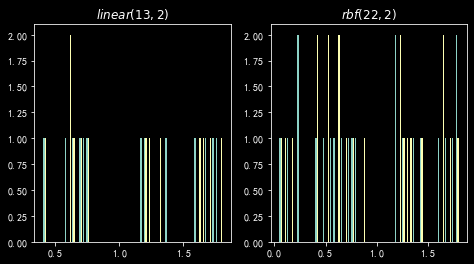

In [117]:
plt.figure(figsize=(12, 4))
xx = np.vstack((x_train_stand[:, ], x_test_stand[:, ]))
yy = np.vstack((y_train.reshape(-1, 1), y_test.reshape(-1, 1)))
x_min, x_max = xx.min() - 0.5, xx.max() + 0.5
y_min, y_max = yy.min() - 0.5, yy.max() + 0.5

kernel = [linear, rbf, poly]
kernel_label = ["linear", "rbf", "poly"]
for ix, svc in enumerate(kernel[:-1]):
    fit = svc.fit(x_train_stand, y_train.ravel())
    # 获取预测值
    y_test_pred = fit.predict(x_test_stand)
    # 获取这个估计器的参数
    svr_params = svc.get_params()
    print(ix,
          svc.kernel,
          'svcs:', kernel[ix])

    support_vectors_ = fit.support_vectors_
    sv = support_vectors_.shape  #支持向量
    sv_mean = standardScaler.inverse_transform(np.mean((support_vectors_), axis=0).reshape(1, -1))  #svm平均值
    support_vectors_d = standardScaler.inverse_transform(support_vectors_)
    support_vectors_d = np.hstack((np.amax(abs(support_vectors_d), axis=1).reshape(-1, 1),
                                   np.amin(abs(support_vectors_d), axis=1).reshape(-1, 1)))  #由每一行中最大和最小值的sv构成的新的sv数组

    sv = support_vectors_d.shape  #支持向量
    sv_sum = (sv[0] * sv[1])  #所有支持向量的数量
    print('sv:', sv,  #支持向量维度
          'sv_sum: %s' % (sv_sum),  #支持向量个数
          'sv_mean:', sv_mean,  #sv平均值
          )

    support_vectors_d_max, support_vectors_d_min = abs(support_vectors_d).max(), abs(
        support_vectors_d).min()  #svm间隔最大值和最小值

    print('sv统计 mean:', np.mean(abs(support_vectors_d)).round(2),  #平均值
          'std:', np.std(support_vectors_d).round(2),  #标准差
          'max:', support_vectors_d_max.round(2),
          'min:', support_vectors_d_min.round(2),
          'sum:', abs(support_vectors_d).sum().round(2),
          )

    # https://blog.csdn.net/gracejpw/article/details/101546293
    # 返回预测的决定系数R^2
    # R^2越接近于1，模型的拟合优度越高。
    print(f'训练集评分: %s ' % (fit.score(x_train_stand, y_train)))
    print(f'测试集评分: %s ' % (fit.score(x_test_stand, y_test)))
    print()
    plt.subplot(1, 3, ix + 1)
    interval = abs(support_vectors_)
    plt.hist(interval, bins=50)
    plt.title(r'$%s %s$' % (fit.kernel, fit.support_vectors_.shape))

plt.show()
# plt.savefig(r'./file/02_svm_svr.png', dpi=200)



In [118]:
# 将标准化后数据，还原成样本数据
x_train_inverse = standardScaler.inverse_transform(x_train_stand)
x_test_inverse = standardScaler.inverse_transform(x_test_stand)

from sklearn.metrics import accuracy_score

# 预测精度得分 normalize=False 返回正确分类样本数
accuracy_score(y_test, y_test_pred, normalize=True)


0.8878504672897196

In [119]:
#设定numpy显示浮点数精度的小数位数,不使用科学记数法
np.set_printoptions(precision=3, suppress=True)

# clf = linear
clf = rbf
score_test = clf.score(x_test_stand, y_test)
print(clf.kernel)

print(clf.predict(x_test_stand)[:3])
print(y_test[:3])

rbf
[ 1  1 -1]
[[ 1]
 [ 1]
 [-1]]


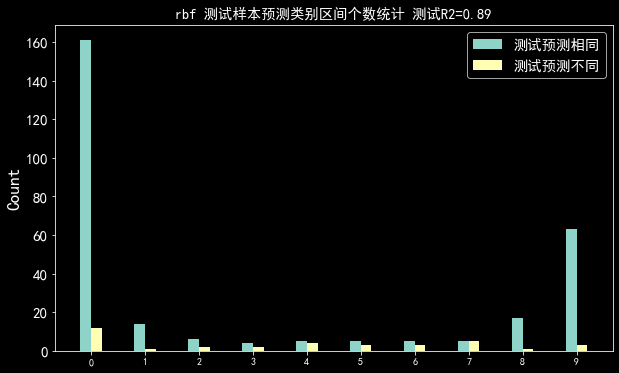

In [120]:
# 绘制训练样本类别预测与目标分类的相同和不同的概率区别统计图
plt.style.use(plt.style.available[4])  #可以通过下标进行选择适合自己的样式
plt.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体,用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

id_test_no = clf.predict(x_test_stand)[:] != y_test.ravel()  #测试样本预测类别与测试目标类别不同的下标
id_test_ok = clf.predict(x_test_stand)[:] == y_test.ravel()  #测试样本预测类别与测试目标类别不同的下标
test_no = clf.predict_proba(x_test_stand)[id_test_no]  #测试样本预测类别与测试目标类别不同的概率值
test_ok = clf.predict_proba(x_test_stand)[id_test_ok]

# 绘制测试样本类别预测与目标分类的相同和不同的概率区别统计图
his_test_ok, _ = np.histogram(test_ok, bins=10)
his_test_no, _ = np.histogram(test_no, bins=10)
# 绘制图像
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
# plt.set_cmap('RdBu')
plt.set_cmap('jet')
x = np.arange(len(_) - 1)
w = 0.1
# 绘制多个bar在同一个图中, 这里需要控制width
plt.bar(x - 1 * w, height=his_test_ok, width=2 * w, align='center')  #测试样本预测相同
plt.bar(x + 1 * w, height=his_test_no, width=2 * w, align='center')  #测试样本预测不同
# 设置坐标轴的标签
ax1.yaxis.set_tick_params(labelsize=15)  # 设置y轴的字体的大小
ax1.set_xticks(x)  # 设置xticks出现的位置
# 设置坐标轴名称
ax1.set_ylabel("Count", fontsize='xx-large')
# 设置标题
ax1.set_title('%s 测试样本预测类别区间个数统计 测试R2=%.2f' % (clf.kernel, score_test), fontsize='x-large')
# 设置图例
plt.legend(('测试预测相同', '测试预测不同'), fontsize='x-large', loc='upper right')
plt.show()

In [121]:
print(y_train[:10].ravel())
print(y_test[:10].ravel())
print(x_train_stand.shape, x_test_stand.shape)
print(y_train.shape, y_train.ndim)
print(x_test_stand[:5])
print(y_test_pred[:50].ravel())

[ 1 -1  1  1 -1 -1 -1 -1  1 -1]
[ 1  1 -1 -1 -1  1 -1 -1  1 -1]
(106, 2) (107, 2)
(106, 1) 2
[[ 0.23   0.233]
 [-0.504 -0.506]
 [ 0.97   0.359]
 [ 0.378  0.212]
 [ 0.218  0.139]]
[ 1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1  0 -1  1  1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1  0 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1
  0  1]
